<a href="https://colab.research.google.com/github/Python-Charmer/Final-Project-Team-Python-Charmer/blob/master/Phase%203/Code/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project - Team Python Charmers


In [0]:
# Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [0]:
# Loading Data From Source.
def load_data():
  url = r'https://raw.githubusercontent.com/Python-Charmer/Final-Project-Team-Python-Charmer/master/Phase1/Data/BreastCancerWisconsin.csv'
  df = pd.read_csv(url)
  names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
  df.columns = names
  return df

In [0]:
# Understanding Missing Values
def clean_missing(df):
  df['A7'] = df['A7'].replace('?',np.NaN)
  df['A7'] = pd.to_numeric(df['A7'])
  print("Below are how many missing values for each column\n")
  print(df.isnull().sum())
  print("\nCleaning missing values with column means\n")
  df = df.fillna(round(df.mean(skipna = True),2))
  print(df.isnull().sum())
  return df
  

In [0]:
# Calculating Summary Metrics
def  sum_metrics(df):
  print("\n Below are the summary metrics of the data \n" + str(df.describe()))
  print ("\n\nThere are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " Columns in this data frame")
  print("\nThere are " + str(len(df['Scn'].unique())) + " unique scn values in the dataset.\n")
  print("Below are the duplicate rows in the dataset.\n")
  print(str(df.loc[df.duplicated(), :]) + "\n")

In [0]:
# Plotting graphs
def plot_graphs(df):
  print("\nBelow are the histograms of A2:A10 \n")
  df.iloc[:,1:10].hist(bins = 8, color="blue", grid="False",alpha = .5, figsize=(12,6))
  plt.tight_layout(rect=(0,0,1.2,1.2))
  plt.show()
  df['Class'].value_counts().plot.bar().set_title("Class Variable: 2 = Benign 4 = Malignant")
  df.plot.scatter(x='A3', y='A4').set_title("Scatter of A3 & A4 90% corr")


In [0]:
# We are getting centers for K = 4 clusters
def get_mids(X):
  clss = KMeans(n_clusters = 4) 
  clss.fit(X)
  cent = clss.cluster_centers_
  print("\n Below are the centers of K = 4 clusters \n")
  print(pd.DataFrame(cent ,columns  = X.columns))

In [0]:
# We are plotting intertia plot to find optimal K
def find_optimal_K(X):
  print("\n Below is the intertia chart \n")
  inertia = []
  k = []
  for i in range(1,15):
    clss = KMeans(n_clusters = i) 
    clss.fit(X)
    iner = clss.inertia_
    k.append(i)
    inertia.append(iner)
  res  = pd.concat([pd.DataFrame(k), pd.DataFrame(inertia)],axis = 1)
  res.columns = ['K','Inertia']
  ax = res.plot("K",marker='o', linestyle='dashed', title = "Optimal K = 2" )
  ax.set_xlabel("Number of Clusters")
  ax.set_ylabel("Inertia")
  
 


In [0]:
# Plotting SD plot to understand the data variance
def sd_plot(X):
  dt = pd.DataFrame(X.std()).sort_values(by = 0, ascending = False)
  dt.reset_index()
  fig, ay = plt.subplots()
  x_val = dt.index
  y_val = dt[0].values
  ay.bar(x = x_val, height = y_val)
  ay.set_xlabel("Features")
  ay.set_ylabel("Standard Deviation")
  ay.set_title("Standard Deviation Plot")


# Plotting Box plot to understand the data variance
def var_plot(df):
  # Box plot showing variation of the columns A2:A10
  data = []
  for i in range(1, 10):
      data.append(df.iloc[:, i])

  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  plt.title("Boxplot showing Variation of Features")
  plt.xlabel("Columns A2 thru A10")
  plt.ylabel("Values")
  ax.boxplot(data, 0,showbox=True,showmeans=True)
  top = 12
  bottom = -2
  ax.set_ylim(bottom, top)
  ax.set_xticklabels(df.iloc[:,1:-1].columns, rotation=45, fontsize=8)
  plt.show()

In [0]:
#Getting centers of optimal K  = 2
def get_centers(X):
  print("\n Below are the centers of K = 2 clusters \n \n")
  mdl = make_pipeline(StandardScaler(), KMeans(n_clusters = 2, n_init=20))
  mdl.fit(X)
  centers = pd.DataFrame(mdl.named_steps['kmeans'].cluster_centers_)
  centers.columns = X.columns
  print(centers)



In [0]:
# Cross tabulating the cluster labels with "Class"
def lables(i,df):
  print("\nBelow are the predicted labels with k = " + str(i) + "\n")
  if i == 4:
    mdl = KMeans(n_clusters = i)
  else:
    mdl =  make_pipeline(StandardScaler(), KMeans(n_clusters = i, n_init=20))
  labels = mdl.fit_predict(df.iloc[:,1:-1])
  ctf = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
  print(pd.crosstab(ctf['labels'], ctf['Class']))

Below are how many missing values for each column

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

Cleaning missing values with column means

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
Class    0
dtype: int64

 Below are the summary metrics of the data 
                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.3454

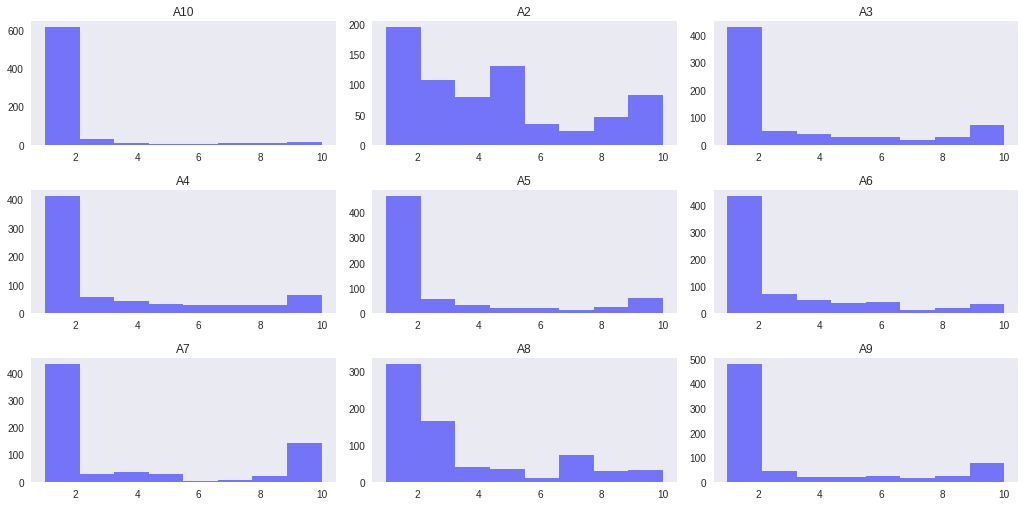

The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.


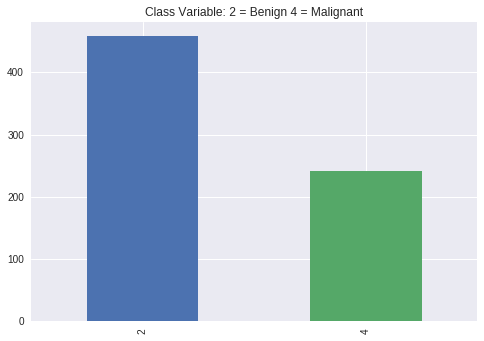

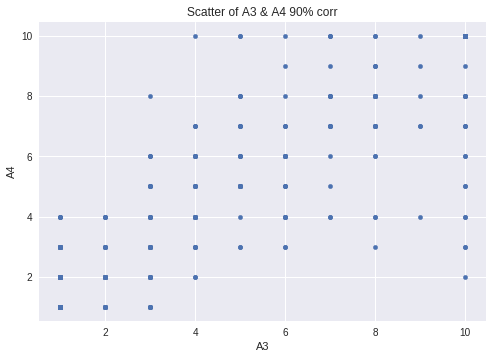

In [11]:
# Main Function Phase 1
df = load_data()
df = clean_missing(df)
sum_metrics(df)
plot_graphs(df)
print("The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.")



 Below are the centers of K = 4 clusters 

         A2        A3        A4        A5        A6        A7        A8  \
0  7.204082  4.846939  5.010204  4.816327  4.071429  9.158571  5.224490   
1  2.984716  1.266376  1.386463  1.312227  2.054585  1.352576  2.080786   
2  6.721519  8.367089  8.405063  7.810127  6.734177  9.227848  7.367089   
3  7.562500  7.421875  7.062500  4.250000  5.875000  3.619063  5.562500   

         A9       A10  
0  3.795918  1.642857  
1  1.213974  1.102620  
2  7.822785  3.822785  
3  7.156250  2.234375  

Below are the predicted labels with k = 4

Class     2   4
labels         
0         7  64
1       444  10
2         7  87
3         0  80

 Below is the intertia chart 



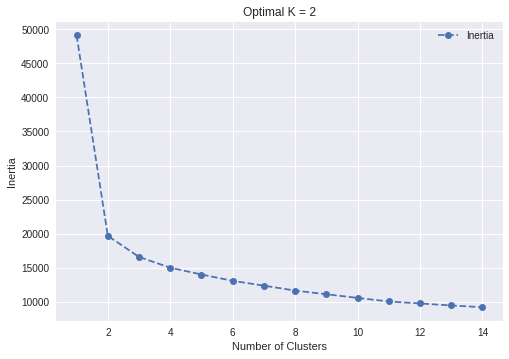

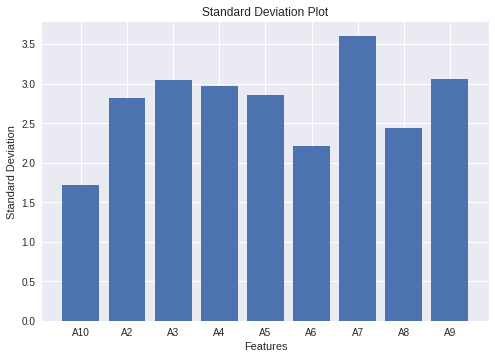

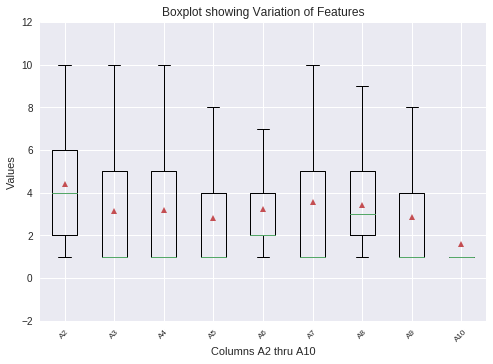


 Based on the Box and SD plot above we can see features A7,A9 has the most variations.


 Below are the centers of K = 2 clusters 
 

         A2       A3        A4        A5        A6        A7        A8  \
0 -0.496223 -0.60690 -0.602092 -0.514917 -0.509713 -0.580604 -0.547702   
1  0.986083  1.20602  1.196465  1.023233  1.012892  1.153765  1.088383   

         A9       A10  
0 -0.530778 -0.303758  
1  1.054751  0.603622  

Below are the predicted labels with k = 2

Class     2    4
labels          
0       446   19
1        12  222


In [12]:
#Main Functions Phase 2
X  = df.drop(['Scn','Class'], axis  = 1)
y = df['Class']
get_mids(X)
lables(4,df)
find_optimal_K(X)
sd_plot(X)
var_plot(df)
print('\n Based on the Box and SD plot above we can see features A7,A9 has the most variations.\n')
get_centers(X)
lables(2,df)


In [25]:
#Main Phase 3
mdl =  make_pipeline(StandardScaler(), KMeans(n_clusters = 2, n_init=20, max_iter = 500))
labels = mdl.fit_predict(X)
df['Predicted'] = labels

for x in range(df.shape[0]):
  if df.iloc[x,11] == 0:
    df.iloc[x,11] = 2
  else:
    df.iloc[x,11] = 4
    
print("\nBelow are the first 15 rows of the dataframe \n")
print(df.head(15))

print("\nBelow are the observtions where the predicted did not match the class \n")

print(df[df['Class'] != df['Predicted']])


def error_rate(predicted,actual):
  tab = pd.crosstab(actual,predicted)
  error2 = tab.iloc[0,1]
  total2 = tab.iloc[0,0] +  tab.iloc[1,0]
  
  error4  = tab.iloc[1,0]
  total4 = tab.iloc[0,1] + tab.iloc[1,1]
  
  B  = str(round(error2/total2,4)*100) + "%"
  M = str(round(error4/total4,4)*100) + "%"
  tot_error = str(round((error2 + error4)/(total2 + total4),4)*100) + "%"
  
  print("\nThe error rate for beningn cells is " + str(B) + "\n")
  print("The error rate for malignent cells is " +str(M) + "\n")
  print("The total error rate is " +str(tot_error) + "\n")
  
error_rate(df['Predicted'], df['Class'])


Below are the first 15 rows of the dataframe 

        Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  Class  Predicted
0   1000025   5   1   1   1   2   1.0   3   1    1      2          2
1   1002945   5   4   4   5   7  10.0   3   2    1      2          4
2   1015425   3   1   1   1   2   2.0   3   1    1      2          2
3   1016277   6   8   8   1   3   4.0   3   7    1      2          4
4   1017023   4   1   1   3   2   1.0   3   1    1      2          2
5   1017122   8  10  10   8   7  10.0   9   7    1      4          4
6   1018099   1   1   1   1   2  10.0   3   1    1      2          2
7   1018561   2   1   2   1   2   1.0   3   1    1      2          2
8   1033078   2   1   1   1   2   1.0   1   1    5      2          2
9   1033078   4   2   1   1   2   1.0   2   1    1      2          2
10  1035283   1   1   1   1   1   1.0   3   1    1      2          2
11  1036172   2   1   1   1   2   1.0   2   1    1      2          2
12  1041801   5   3   3   3   2   3.0   4   4    1     